# Notebook to test visualization code

In [1]:
import numpy as np

import plotting

In [3]:
# 1. Init
exercise_classes = [
    "BodyWeightSquats",
    "HandstandPushups",
    "HandstandWalkin",
    "JumpingJack",
    "JumpRope",
    "Lunges",
    "PullUps",
    "PushUps",
    "TrampolineJumping",
    "WallPushUps"
]
num_classes = len(exercise_classes)
num_samples = 500 
num_epochs = 200

# 2. Sample data
# 2.1 CM
confusion_matrix = np.array([[50, 2, 1, 0, 0, 0, 0, 0, 0, 0],
                             [5, 45, 0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 48, 2, 0, 0, 0, 0, 0, 0],
                             [2, 0, 1, 47, 0, 0, 0, 0, 0, 0],
                             [12, 0, 0, 0, 49, 1, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 50, 0, 0, 0, 0],
                             [0, 6, 0, 34, 0, 0, 48, 1, 0, 1],
                             [0, 0, 0, 0, 0, 0, 0, 50, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0, 50, 0],
                             [0, 0, 5, 0, 0, 1, 0, 0, 0, 50]])

# 2.2 ROC AUC
y_true = np.random.randint(0, num_classes, size=num_samples)
y_score = np.random.rand(num_samples, num_classes)
y_score = y_score / y_score.sum(axis=1, keepdims=True)  

# 2.3 Training history
train_loss = np.linspace(1.0, 0.1, num_epochs) + np.random.normal(0, 0.05, num_epochs)
val_loss = np.linspace(1.0, 0.15, num_epochs) + np.random.normal(0, 0.05, num_epochs)
train_acc = np.linspace(0.5, 0.95, num_epochs) + np.random.normal(0, 0.02, num_epochs)
val_acc = np.linspace(0.5, 0.9, num_epochs) + np.random.normal(0, 0.02, num_epochs)

hist = {
    "train_loss": train_loss.tolist(),
    "val_loss": val_loss.tolist(),
    "train_acc": train_acc.tolist(),
    "val_acc": val_acc.tolist()
}

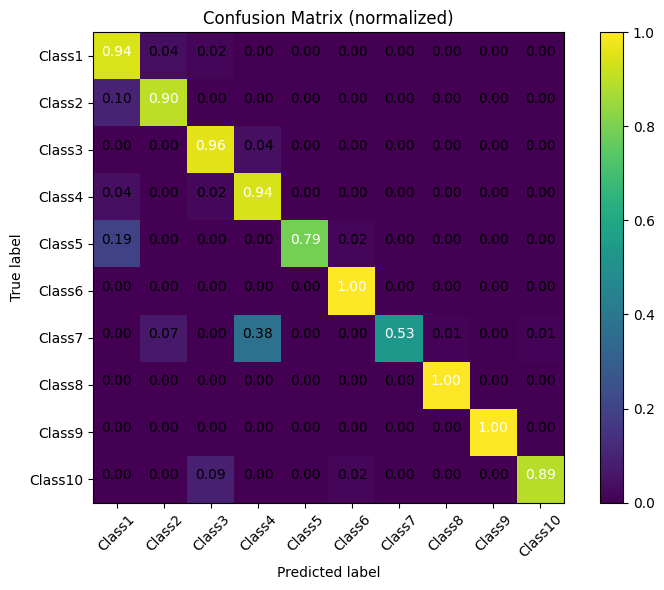

In [4]:
plotting.plot_confusion_matrix(confusion_matrix, normalize=True)

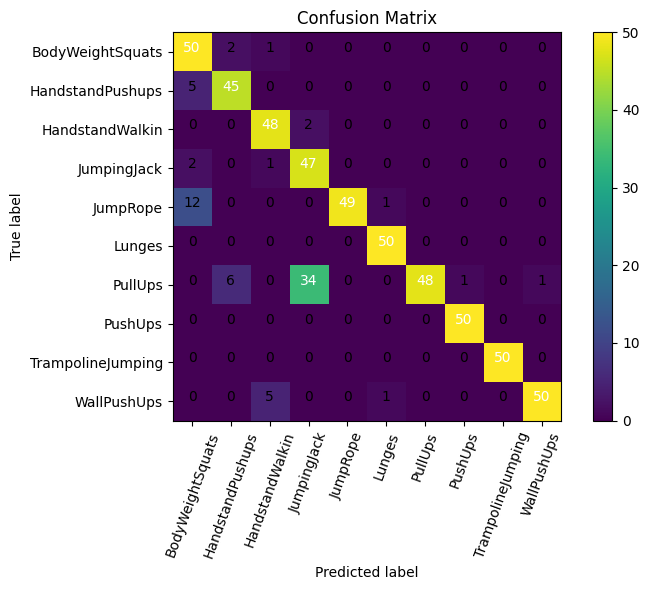

In [5]:
plotting.plot_confusion_matrix(confusion_matrix, class_names=exercise_classes, normalize=False, x_label_rotation = 70)

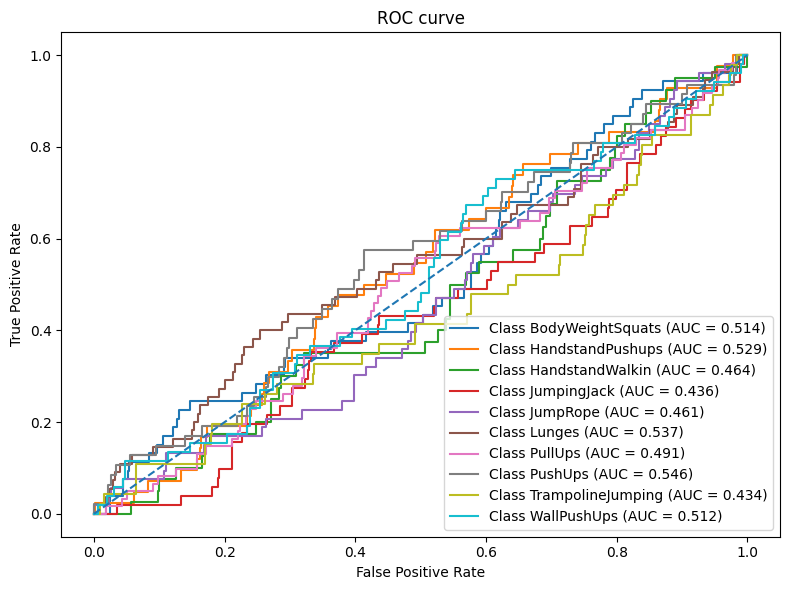

([0.5144991769026213,
  0.5292680390933666,
  0.46353260869565216,
  0.43569588191624087,
  0.4607234814908615,
  0.5373237997957099,
  0.4914671944434071,
  0.5459114179700344,
  0.43411223903466767,
  0.5115899725274725],
 np.float64(0.4924123811870034))

In [6]:
plotting.multiclass_roc_auc(y_true, y_score, exercise_classes)

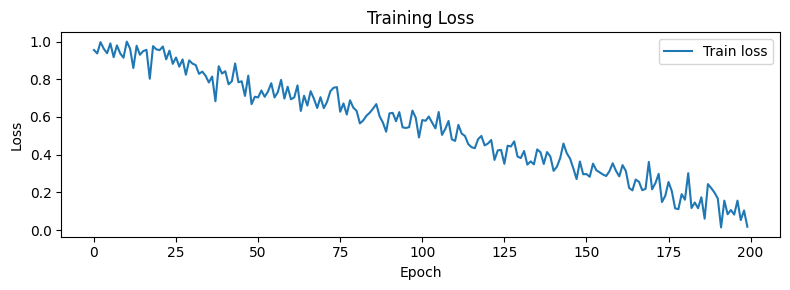

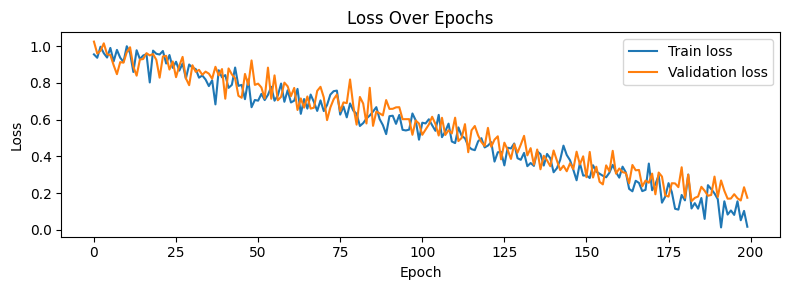

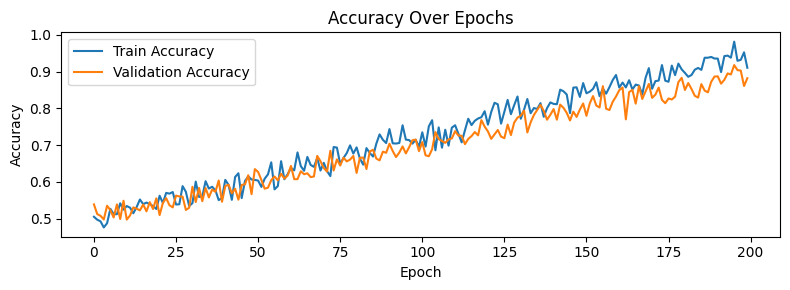

In [7]:
plotting.plot_history(hist)